[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    

In [1]:
df_bike_orig<-read.csv('data/bike-sharing-hour.csv')
head(df_bike_orig)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [2]:
summary(df_bike_orig)

    instant         dteday              season            yr        
 Min.   :    1   Length:17379       Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Mode  :character   Median :3.000   Median :1.0000  
 Mean   : 8690                      Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379                      Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weathersit         te

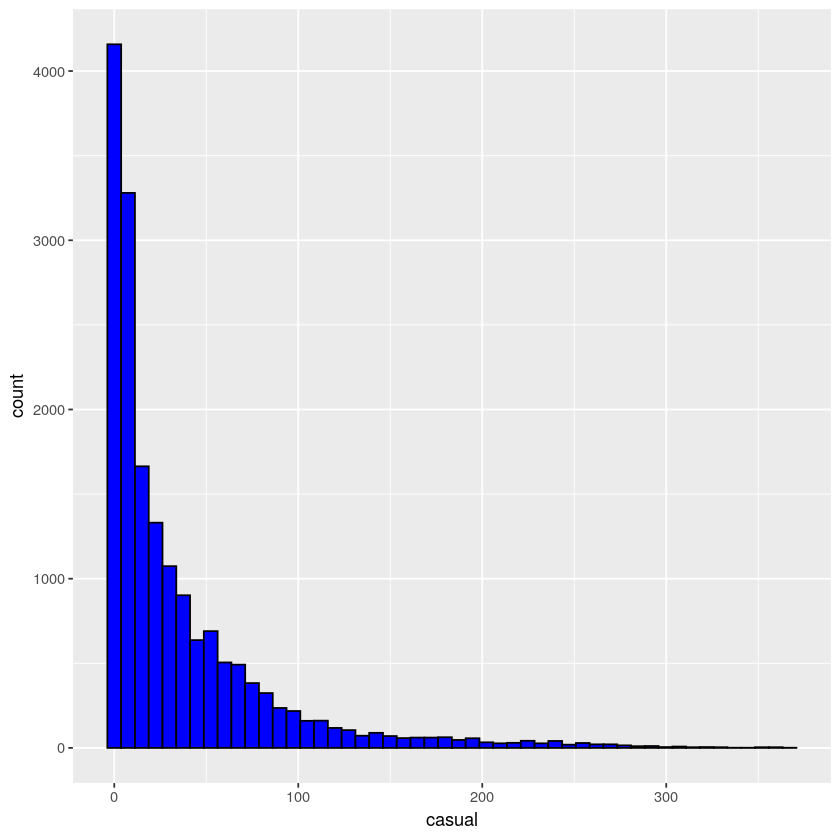

In [7]:
library(tidyverse)
ggplot(df_bike_orig, aes(x=casual))+geom_histogram(bins=50, fill='blue', color='black')

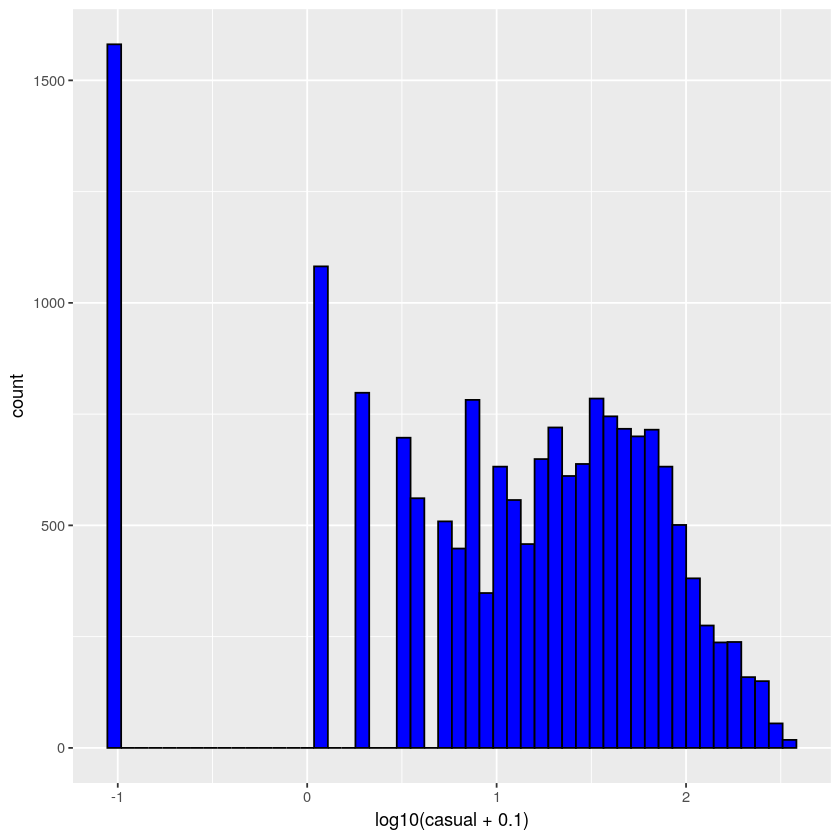

In [51]:
ggplot(df_bike_orig, aes(x=log10(casual+0.1)))+geom_histogram(bins=50, fill='blue', color='black')

In [18]:
cor(df_bike_orig |> select("casual","registered","cnt","season","yr","mnth","hr","holiday","weekday","workingday",
                           "weathersit","temp","atemp","hum","windspeed"))

,casual,registered,cnt,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
casual,1.00000000,0.50661770,0.69456408,0.120206447,0.142778528,0.068457301,0.301201730,0.031563628,0.032721415,-0.300942486,-0.152627885,0.459615646,0.454080065,-0.34702809,0.090286775
registered,0.50661770,1.00000000,0.97215073,0.174225633,0.253684310,0.122272967,0.374140710,-0.047345424,0.021577888,0.134325791,-0.120965520,0.335360849,0.332558635,-0.27393312,0.082320847
cnt,0.69456408,0.97215073,1.00000000,0.178055731,0.250494899,0.120637760,0.394071498,-0.030927303,0.026899860,0.030284368,-0.142426138,0.404772276,0.400929304,-0.32291074,0.093233784
season,0.12020645,0.17422563,0.17805573,1.000000000,-0.010742486,0.830385892,-0.006116901,-0.009584526,-0.002335350,0.013743102,-0.014523552,0.312025237,0.319379811,0.15062475,-0.149772751
yr,0.14277853,0.25368431,0.25049490,-0.010742486,1.000000000,-0.010472929,-0.003867005,0.006691617,-0.004484851,-0.002196005,-0.019156853,0.040913380,0.039221595,-0.08354642,-0.008739533
mnth,0.06845730,0.12227297,0.12063776,0.830385892,-0.010472929,1.000000000,-0.005771909,0.018430325,0.010400061,-0.003476922,0.005399522,0.201691494,0.208096131,0.16441144,-0.135386323
hr,0.30120173,0.37414071,0.39407150,-0.006116901,-0.003867005,-0.005771909,1.000000000,0.000479136,-0.003497739,0.002284998,-0.020202528,0.137603494,0.133749965,-0.27649783,0.137251568
holiday,0.03156363,-0.04734542,-0.03092730,-0.009584526,0.006691617,0.018430325,0.000479136,1.000000000,-0.102087791,-0.252471370,-0.017036113,-0.027340477,-0.030972737,-0.01058846,0.003987632
weekday,0.03272142,0.02157789,0.02689986,-0.002335350,-0.004484851,0.010400061,-0.003497739,-0.102087791,1.000000000,0.035955071,0.003310740,-0.001794927,-0.008820945,-0.03715827,0.011501545
workingday,-0.30094249,0.13432579,0.03028437,0.013743102,-0.002196005,-0.003476922,0.002284998,-0.252471370,0.035955071,1.000000000,0.044672224,0.055390317,0.054667235,0.01568751,-0.011829789


In [52]:
df_bike <- df_bike_orig |> 
    mutate(season=factor(season, labels=c('springer', 'summer', 'fall', 'winter'))) |>
    mutate(season=as.factor(if_else(season %in% c('fall','springer'),'sp-fall', as.character(season)))) |>
    mutate(workingday=factor(workingday, labels=c('no', 'yes'))) |>
    mutate(hr_i=sin(hr/24*2*pi)) |>
    mutate(hr_j=cos(hr/24*2*pi)) |>
    mutate(log_casual = log10(casual+0.1))




In [53]:
idx <- sample(1:nrow(df_bike), nrow(df_bike)*0.7)
df_bike.train <- df_bike[idx, ]
df_bike.test <- df_bike[-idx, ]

In [49]:
model <- lm(df_bike.train, 
            formula=casual~season+workingday+atemp+hum+windspeed+hr_j+hr_i+weathersit)
summary(model)


Call:
lm(formula = casual ~ season + workingday + atemp + hum + I(windspeed^2) + 
    hr_j + hr_i + weathersit, data = df_bike.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.926 -19.439  -3.315  12.722 261.477 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     32.8615     1.5999  20.540  < 2e-16 ***
seasonsummer    11.2878     0.7379  15.297  < 2e-16 ***
seasonwinter     7.5924     0.7660   9.912  < 2e-16 ***
workingdayyes  -33.8919     0.6479 -52.308  < 2e-16 ***
atemp          105.3681     1.8863  55.859  < 2e-16 ***
hum            -33.7996     2.0712 -16.319  < 2e-16 ***
I(windspeed^2) -39.7230     5.3198  -7.467 8.76e-14 ***
hr_j           -23.4105     0.4642 -50.433  < 2e-16 ***
hr_i           -19.0295     0.4784 -39.780  < 2e-16 ***
weathersit      -4.0787     0.5489  -7.431 1.15e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.19 on 12155 degrees of freedom
Multiple R-sq

In [42]:
df_bike.train$pred <- predict(model, df_bike.train)
caret::postResample(df_bike.train$pred, df_bike.train$casual)

RMSE   Rsquared        MAE 
33.2075305  0.5549033 22.3475408

In [43]:
df_bike.test$pred <- predict(model, df_bike.test)
caret::postResample(df_bike.test$pred, df_bike.test$casual)

RMSE   Rsquared        MAE 
32.0261734  0.5586478 22.1503018

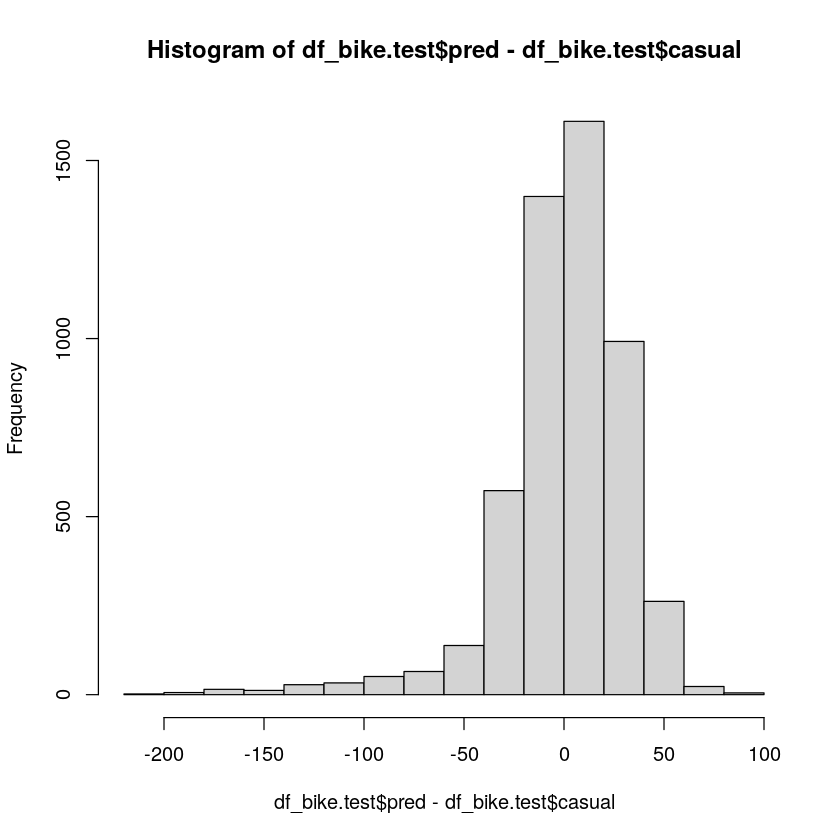

In [44]:
hist(df_bike.test$pred-df_bike.test$casual)

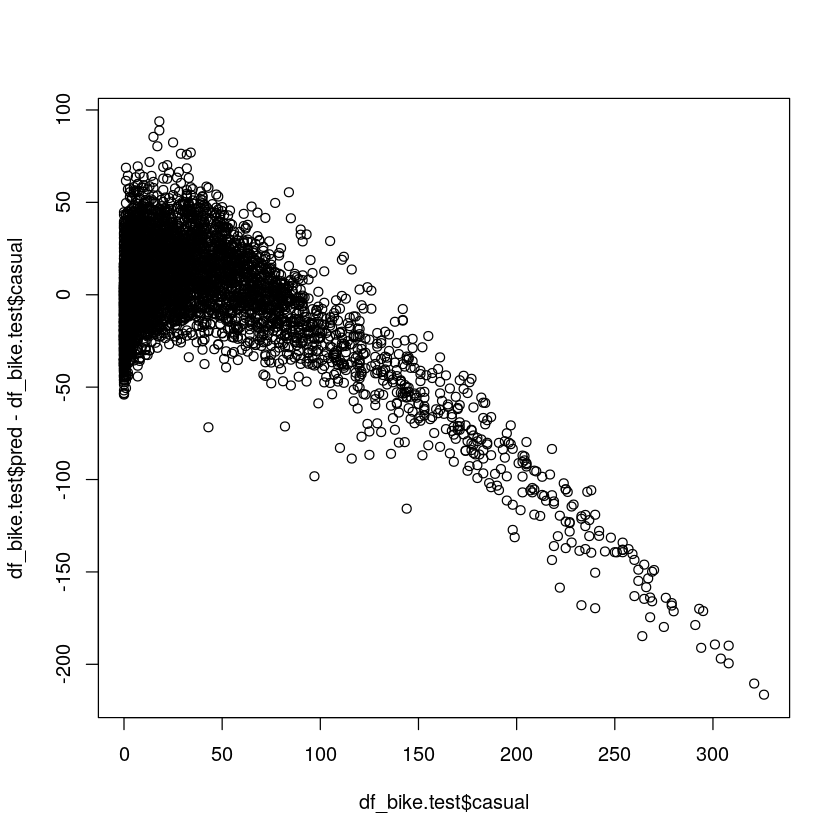

In [45]:
plot(df_bike.test$casual, df_bike.test$pred-df_bike.test$casual)

In [56]:
model <- lm(df_bike.train, 
            formula=log_casual~season+workingday+atemp+hum+windspeed+hr_j+hr_i+weathersit)
summary(model)


Call:
lm(formula = log_casual ~ season + workingday + atemp + hum + 
    windspeed + hr_j + hr_i + weathersit, data = df_bike.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.65018 -0.23135  0.07022  0.34175  1.71136 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.529593   0.025717  20.593  < 2e-16 ***
seasonsummer   0.205384   0.011273  18.219  < 2e-16 ***
seasonwinter   0.193267   0.011625  16.625  < 2e-16 ***
workingdayyes -0.349623   0.009931 -35.206  < 2e-16 ***
atemp          2.017526   0.028669  70.372  < 2e-16 ***
hum           -0.128607   0.031576  -4.073 4.67e-05 ***
windspeed     -0.215716   0.040257  -5.359 8.54e-08 ***
hr_j          -0.513182   0.007066 -72.627  < 2e-16 ***
hr_i          -0.512354   0.007329 -69.907  < 2e-16 ***
weathersit    -0.136354   0.008285 -16.458  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5062 on 12155 degrees of freedom
Mul

In [59]:
df_bike.test$pred_log <- predict(model, df_bike.test)
caret::postResample(df_bike.test$pred_log, df_bike.test$log_casual)

RMSE  Rsquared       MAE 
0.4970033 0.6686066 0.3736168

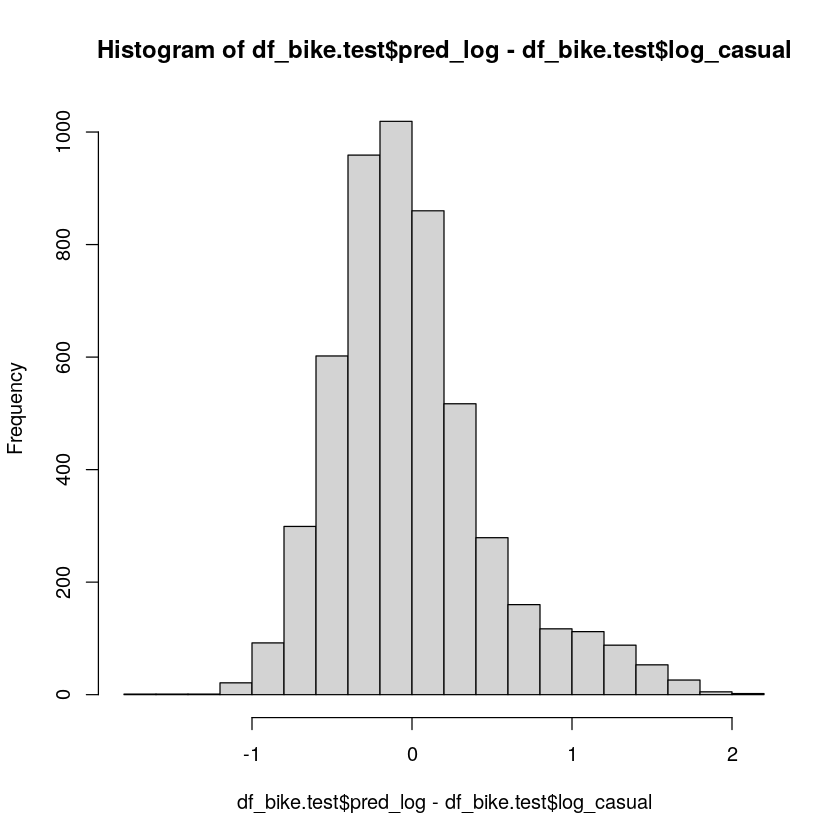

In [60]:
hist(df_bike.test$pred_log-df_bike.test$log_casual)

In [62]:
df_bike.test$pred <- 10^(df_bike.test$pred_log)-0.1
caret::postResample(df_bike.test$pred, df_bike.test$casual)

RMSE   Rsquared        MAE 
48.4091964  0.4843484 21.5001214

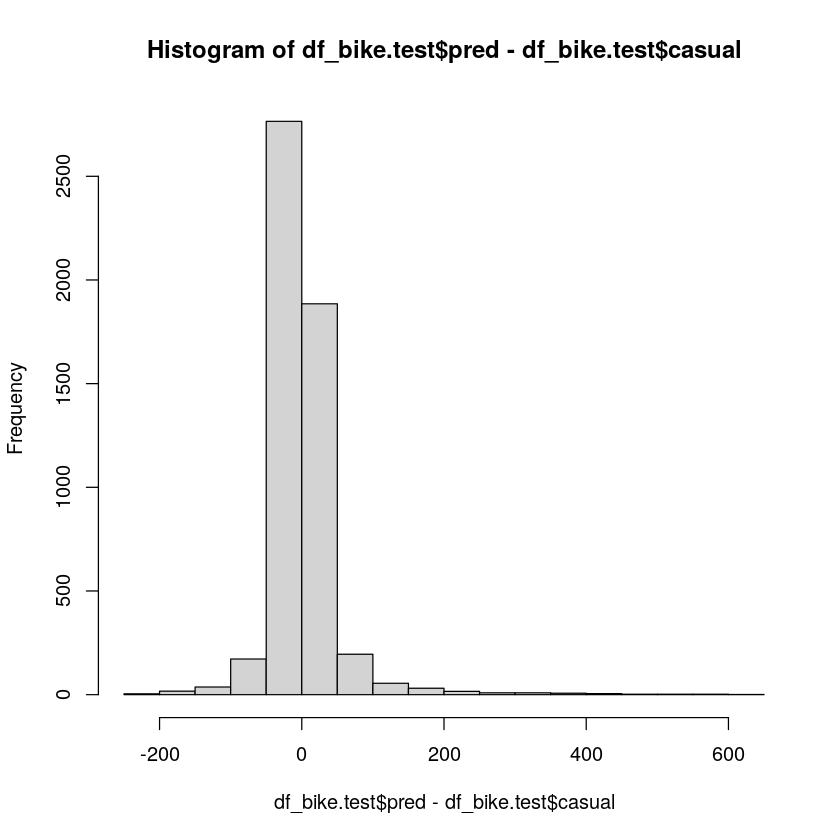

In [63]:
hist(df_bike.test$pred-df_bike.test$casual)

## Poisson

Como estamos trabajando con una variable de conteos tiene sentido trabajar con una regresión de Poisson

In [74]:
model <- glm(df_bike.train, 
            formula=casual~season+workingday+atemp+hum+windspeed+hr_j+hr_i+factor(weathersit),
            family=poisson)
summary(model)


Call:
glm(formula = casual ~ season + workingday + atemp + hum + windspeed + 
    hr_j + hr_i + factor(weathersit), family = poisson, data = df_bike.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-17.643   -2.733   -1.035    1.427   18.489  

Coefficients:
                     Estimate Std. Error  z value Pr(>|z|)    
(Intercept)          2.318426   0.010096  229.627  < 2e-16 ***
seasonsummer         0.361922   0.003505  103.266  < 2e-16 ***
seasonwinter         0.305017   0.004339   70.298  < 2e-16 ***
workingdayyes       -0.850894   0.003063 -277.754  < 2e-16 ***
atemp                3.015646   0.010867  277.514  < 2e-16 ***
hum                 -0.441663   0.010851  -40.704  < 2e-16 ***
windspeed           -0.201254   0.013112  -15.349  < 2e-16 ***
hr_j                -0.784090   0.002875 -272.715  < 2e-16 ***
hr_i                -0.714805   0.002933 -243.733  < 2e-16 ***
factor(weathersit)2 -0.032853   0.004038   -8.135 4.11e-16 ***
factor(weathersit)3 -

In [75]:
df_bike.test$pred <- predict(model, df_bike.test, type='response')
caret::postResample(df_bike.test$pred, df_bike.test$casual)

RMSE   Rsquared        MAE 
31.2001015  0.6305902 17.0228792

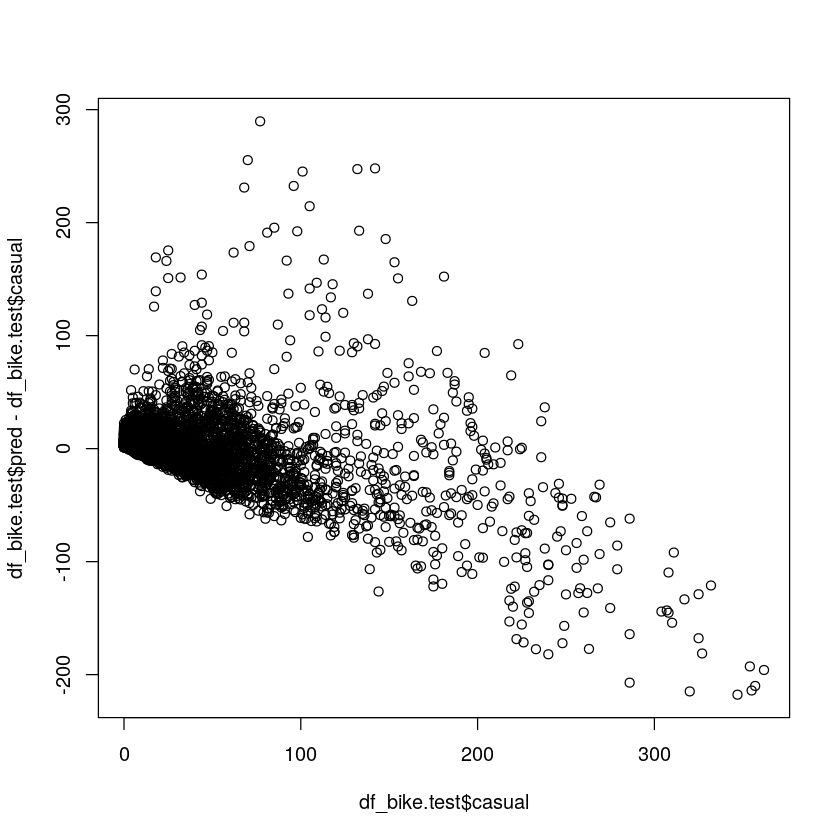

In [76]:
plot(df_bike.test$casual, df_bike.test$pred-df_bike.test$casual)

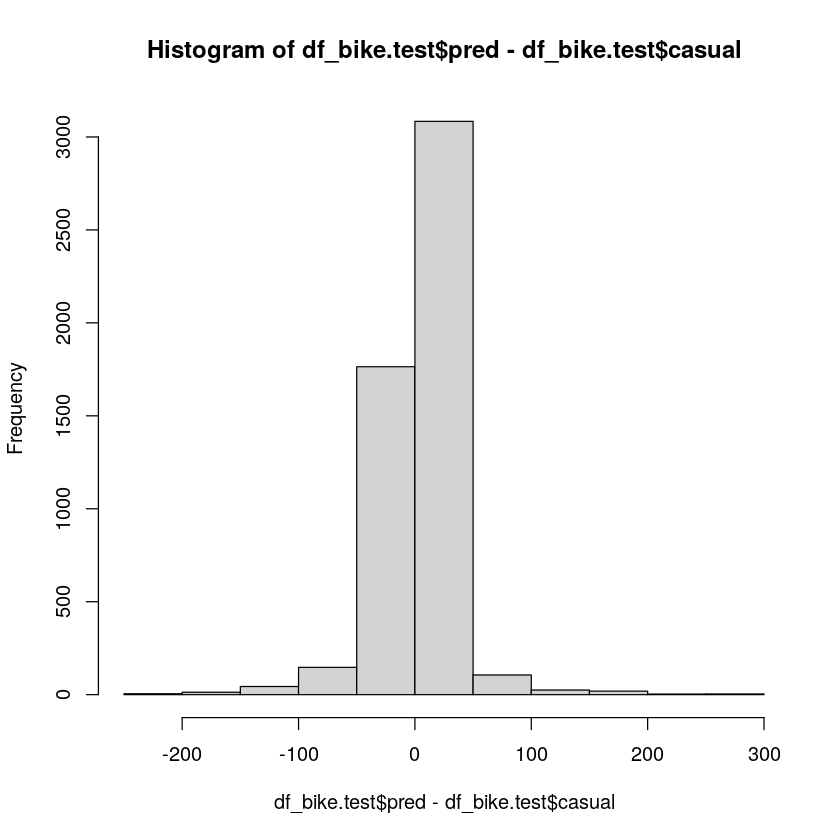

In [70]:
hist(df_bike.test$pred-df_bike.test$casual)